# CIGRE TB 880 - 2022
## Power cable rating examples for calculation tool verification

Reference IEC standards:
- "IEC 60287-1-1, Electric Cables - Calculation of the Current Rating - Part 1-1: Current Rating Equations (100 % load factor) and Calculation of Losses – General", IEC,  2014-11.  
- "IEC 60287-2-1, Electric Cables – Calculation of the Current Rating – Part 2-1: Thermal Resistance – Calculation of Thermal Resistance, Edition 2.0", IEC, 2015-2.

In [1]:
# Import libraries
import math as mt
import numpy as np
#import pandas as pd
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# 4. Introductory Case study 0

<div>
<img src="./img/img4_cs05.png" width="400"/> <img src="./img/img6_numbFlat.png" width="200"/>
</div>

- 3: Outer cable lagging phase
- 1: Central cable
- 2: Outer cable leading phase

**Input data:**

In [2]:
# 4.2.1 Grid parameters

U = 132 #[kv] Voltage level
f = 50 #[Hz] Frequency

<div>
<img src="./img/img2_xlpe132kV.png" width="300"/> <img src="./img/img3_cross.png" width="450"/>
</div>

In [3]:
# 4.2.2 Cable parameters

# List of the cable composition: [Conductor, Conductor_screen, XLPE_insulation, Insulation_screen, Sheath, Oversheath]
thk = [0, 1.5, 15.5, 1.3, 0.8, 3.5] #[mm] Thickness of the layer
dia = [0]*6 #[mm] Diammeter after the layer
dia[0] = 30.3 #[mm] Conductor diameter (630 mm2)

for i in range(1,len(dia)):
    dia[i] = dia[i-1] + 2*thk[i]

# Conductor
R_0 = 28.3e-6 #[Ohm/m] DC resistance at 20°C. From IEC 60228 Table 2
alpha_20 = 3.93e-3 #[K^-1] Temperature coefficient. From IEC 60287-1-1 Table 1 (Copper)
k_s = 1 # Skin effect coefficient (round stranded conductor and extruded insulation system). From IEC 60287-1-1 Table 2
k_p = 1 # Proximity effect coefficient (round stranded conductor and extruded insulation system). From IEC 60287-1-1 Table 2

# Insulation layer
epsilon = 2.5 # Relative permittivity. From IEC 60287-1-1 Table 3
tan_delta = 0.001 # Loss factor. From IEC 60287-1-1 Table 3
rho_i = 3.5 #[Km/W] Thermal resistivity. From CIGRE TB 640 Table 1
rho_sc = 2.5 #[Km/W] Thermal resistivity screen (semi-conducting layer). CIGRE WG B1.56, IEC 60949

# Metal sheath
t_s = thk[4] #[mm] From Manufacturer datasheet
rho_s_20 = 2.84e-8 #[Ohm/m] Resistivity at 20°c. From IEC 60287-1-1 Table 1
alpha_s_20 = 4.03e-3 #[K^-1] Temperature coefficient. From IEC 60287-1-1 Table 1 (Aluminium)

# Oversheath
rho_Tos = 3.5 #[Km/W] Thermal resistivity. From IEC 60287-2-1 Table 1

In [4]:
# 4.2.5 Operating conditions

theta_c_max = 90 #[°C] Maximum operating temperature of conductor. User
theta_air = 25 #[°C] Maximum air temperature
theta_a = 25 #[°C] Ambient ground temperature. From IEC 60287-3-1 Section 3.2.1
rho_Tsoil = 1 #[Km/W] Thermal resistivity. From IEC 60287-3-1 Section 3.2.2

**IEC 60287-2-1, Electric Cables - Calculation of the Current Rating - Part 2-1: Thermal Resistance - Calculation of Thermal Resistance. Table 2**

<div>
<img src="./img/img5_2-1_Table2.png" width="500"/>
</div>

In [5]:
# 4.10.1.1 Installation

Z = 0.62 # From IEC 60287-2-1 Table 2
E = 1.95
g = 0.25

In [6]:
# Unfilled trough external dimensions and number of cables

tr_deep = 0.360 #[m]
tr_wide = 0.550 #[m]
p = tr_deep*2+tr_wide #[m] Part of the trough perimeter which is effective for heat dissipation

NC = 3 # Amount of cables laid into the trough

## 4.10 CASE #0-5: Sub-case study with cables in an unfilled trough



### 4.4.1 Capacitance

$ C = \frac{\epsilon}{18\ln(\frac{D_i}{d_c})} 10^{-9} $ (F/m). From IEC 60287-1-1 Section 2.2

In [7]:
# 4.4.1 Capacitance

d_c = dia[1] #[mm] diameter of conductor, including screen, if any
D_i = dia[2] #[mm] external diameter of the insulation (excluding screen)

C = (epsilon/(18*mt.log(D_i/d_c)))*1e-9 #[F/m] From IEC 60287-1-1 Section 2.2
print("C = %.10E F/m" % C)

C = 2.1107662202E-10 F/m


In [8]:
# 4.4.2 Reactance

omega = 2*mt.pi*f #[rad/s] Angular frequency
s = dia[5] #[mm] distance between conductor axes in the electrical section being considered
d = D_i + 2*thk[3] + thk[4] #[mm] mean diameter of the sheath

X = 2*omega*1e-7*mt.log(2*s/d) #[Ohm/m] From IEC 60287-1-1 Section 2.3.3. Reactance of sheath or screen per unit length of cable for two adjacent single-core cables

# 4.8.1.1 Reactance
X_m = 2*omega*1e-7*mt.log(2) #[Ohm/m] From IEC 60287-1-1 Section 2.3.3. Mutual reactance per unit length of cable between the sheath of an outer cable and the conductors of the other two

print("X = %.10E \u03A9/m\nXm = %.10E \u03A9/m" % (X, X_m))

X = 5.0403313985E-05 Ω/m
Xm = 4.3551721806E-05 Ω/m


In [9]:
# 4.4.3 Electrical resistance of the metal sheath at 20°C

A_s = mt.pi*d*t_s #[mm2] cross section

R_s0 = rho_s_20/(A_s*1e-6) #[Ohm/m]
print("Rs0 = %.10E \u03A9/m" % R_s0)

Rs0 = 1.6691286499E-04 Ω/m


In [10]:
# 4.4.4 Thermal resistance between conductor and sheath

t_1 = thk[1:4] #[mm] insulation thickness
d_c_arr = dia[0:3] #[mm] diameter
rho_T = [rho_sc, rho_i, rho_sc] #[Km/W] Thermal resistivity
T1_layer = [0]*len(rho_T) #[Km/W] Thermal resistance

for i in range(len(T1_layer)):
    T1_layer[i] = (rho_T[i]/(2*mt.pi))*mt.log(1+2*t_1[i]/d_c_arr[i]) #[Km/W] From IEC 60287-2-1 Section 4.1.2.1

T1 = sum(T1_layer) #[Km/W]
print("T1 = %.10f Km/W" % T1)

T1 = 0.4198714890 Km/W


In [11]:
# 4.4.5 Thermal resistance of the oversheath

t_3 = thk[5] #[mm] oversheath thickness
D_a = dia[4] #[mm] reference diameter

T3 = (1/(2*mt.pi))*rho_Tos*mt.log(1+2*t_3/D_a) #[Km/W] From IEC 60287-2-1 Section 4.1.4.1
# T3 = 1.6*T3 #[Km/W] From IEC 60287-2-1 Section 4.2.4.3.2
# The 1,6 multiplication factor for T3 of touching cables in trefoil formation only applies to buried cables (IEC 60287-2-1 Section 4.2.4.3).
print("T3 = %.10f Km/W" % T3)

T3 = 0.0541996092 Km/W


In [12]:
# 4.4.7 Dielectric losses

U_0 = U/mt.sqrt(3)*1e3 #[V]

W_d = omega*C*U_0**2*tan_delta #[W/m] From IEC 60287-1-1 Section 2.2
print("Wd = %.10f W/m" % W_d)

Wd = 0.3851382172 W/m


In [13]:
# 4.10.2.2 Heat dissipation coefficient 

D_e = dia[5]*1e-3 #[m] External diameter in meters
h = Z/(D_e**g) + E #[W/(m^2 K^(5/4)] From IEC 60287-2-1 Section 4.2.1.1
print("h = %.10f W/(m^2 K^(5/4))" % h)

h = 3.1327826671 W/(m^2 K^(5/4))


## 4.5 case #0-1: Results dependent on the temperature
### 4.5.1  Results linked to the maximum operating temperature
### 4.5.2 First iteration & 4.5.3 Next iterations

In [14]:
# Criteria of convergence
tempTol = 1e-11 #[K] Temperature tolerance threshold for convergence
currTol = 1e-11 #[A] Current tolerance threshold for convergence
maxIte = 200 # Maximum number of iterations

# Other parameters
n = 1 # Single-core cable
d_c = dia[0] # Conductor diameter
lambda_2 = 0 # The cable is unarmoured
T2 = 0 # The cable is unarmoured
W_a = 0 # The cable is unarmoured
# NOTE: IEC ArmoUred Cable is not the same that NEC(NFPA 70) Armored Cable (Type AC - Article 320), which is similar to Metal-Clad Cable (Type MC Article 330)

# Variable Preallocation
R = np.zeros((maxIte,NC)) #[Ohm/m] AC resistance of conductor
R_s = np.zeros((maxIte,NC)) #[Ohm/m] Resistance of sheath
lambda_1 = np.zeros((maxIte,NC)) # Loss factor
I = np.zeros((maxIte,NC)) #[A] Current rating
W_c = np.zeros((maxIte,NC)) #[W/m] Conductor losses 
W_s = np.zeros((maxIte,NC)) #[W/m] Sheath losses
theta_c = np.zeros((maxIte,NC)) #[°C] Conductor operation temperature
theta_s = np.zeros((maxIte,NC)) #[°C] Sheath temperature

# Initial values
theta_c[0] = theta_c_max # Maximum allowable conductor temperature
theta_s[0] = theta_c_max-10 # Assumption to initializate!
Delta_theta_tr = theta_air # Morello [17]
frrt_Delta_theta_s0 = np.ones(NC)*2 # From IEC 60287-2-1 Section 4.2.1.1

for i in range(maxIte):
    print("Iteration: %2d" % (i+1))
    # 4.5.1  Results linked to the maximum operating temperature
    # 4.5.1.1 DC resistance of conductor
    R_prime = R_0*(1+alpha_20*(theta_c[i]-20)) #[Ohm/m] From IEC 60287-1-1 Section 2.1.1
    #print("R' = %.10E W/m" % R_prime[0])
    
    # 4.5.1.2 Skin effect factor
    x_s = np.sqrt(8*mt.pi*f/R_prime*1e-7*k_s) # From IEC 60287-1-1 Section 2.1.2
    # For 0 < x_s <= 2,8
    y_s = x_s**4/(192+0.8*x_s**4)
    #print("xs = %.10f\nys = %.10f" % (x_s[0], y_s[0]))

    # 4.5.1.3 Proximity effect factor 
    x_p = np.sqrt(8*mt.pi*f/R_prime*1e-7*k_p) # From IEC 60287-1-1 Section 2.1.4.1
    y_p = x_p**4/(192+0.8*x_p**4)*(d_c/s)**2*(0.312*(d_c/s)**2+1.18/(x_p**4/(192+0.8*x_p**4)+0.27))
    #print("xp = %.10f\nyp = %.10f" % (x_p[0], y_p[0]))
    
    # 4.5.1.4 AC resistance of conductor 
    R[i] = R_prime*(1+y_s+y_p) #[Ohm/m] From IEC 60287-1-1 Section 2.1
    print("R = %.10E Ohm/m" % R[i][0])
    
    # 4.5.2 First iteration & 4.5.3 Next iterations
    # 4.5.2.1 Resistance of sheath at operating temperature
    R_s[i] = R_s0*(1+alpha_s_20*(theta_s[i]-20)) #[Ohm/m] From IEC 60287-1-1 Section 2.3
    print("Rs = %.10E Ohm/m" % R_s[i][0])
    
    # 4.10.3.2 Losses caused by circulating currents (4.8.2.3)
    # For three single-core cables in flat formation, without transposition, with sheaths bonded at both ends,
    # the resistance of the sheath or screen at its operating temperaturehas a different formula for each phase,
    # based on the intermediate variables P and Q:
    P = X + X_m #[Ohm/m] From IEC 60287-1-1 Section 2.3.3
    Q = X - X_m/3 #[Ohm/m]
    
    lambda_1m_prime = (R_s[i][1]/R[i][1])*(Q**2/(R_s[i][1]**2+Q**2)) # From IEC 60287-1-1 Section 2.3.3
    lambda_11_prime = (R_s[i][0]/R[i][0])*(0.75*P**2/(R_s[i][0]**2+P**2)+0.25*Q**2/(R_s[i][0]**2+Q**2)+2*R_s[i][0]*P*Q*X_m/(mt.sqrt(3)*(R_s[i][0]**2+P**2)*(R_s[i][0]**2+Q**2)))
    lambda_12_prime = (R_s[i][2]/R[i][2])*(0.75*P**2/(R_s[i][2]**2+P**2)+0.25*Q**2/(R_s[i][2]**2+Q**2)-2*R_s[i][2]*P*Q*X_m/(mt.sqrt(3)*(R_s[i][2]**2+P**2)*(R_s[i][2]**2+Q**2)))
    
    lambda_1_prime = np.array([lambda_11_prime, lambda_1m_prime, lambda_12_prime]) # Array of loss factor
    
    # Since the conductor is not Milliken, eddy-current loss is ignored (lambda_1_prime2 = 0)
    lambda_1_prime2 = 0
         
    lambda_1[i] = lambda_1_prime+lambda_1_prime2
    print("\u03BB1 = %.10f" % lambda_1[i][0])
    
    # 4.10.3.4 Heating due to dielectric losses (4.9.3.2)
    Delta_theta_d = W_d*(((1/(1+lambda_1[i])+lambda_2)-1/2)*T1-(n*lambda_2*T2/(1+lambda_1[i]+lambda_2))) #[K] From IEC 60287-2-1 Section 4.2.1.1
    
    # 4.10.3.5 KA factor (4.9.3.3)
    K_A = (mt.pi*D_e*h/(1+lambda_1[i]+lambda_2))*(T1/n+T2*(1+lambda_1[i])+T3*(1+lambda_1[i]+lambda_2)) #[K^(-1/4)] From IEC 60287-2-1 Section 4.2.1.1
           
    # 4.10.3.6 Cable surface temperature
    # Iterative method described in Section 4.9.6.4 -> Section 4.9.3.5.
    #Delta_theta = theta_c[i] - (theta_a + Delta_theta_tr) # IEC 60287-2-1 rating is “calculated as for a cable in free air, but the ambient temperature shall be increased by Delta_theta_tr
    Delta_theta = theta_c_max - (theta_a + theta_air) # Always keep theta_c = 90°C and Delta_theta_tr 25°C for convergence?
    Delta_theta_ds = 0 # The cables are being protected by the trough cover and hence no direct solar radiation is considered
    
    Tol2 = 1e-12 # Tolerance threshold for convergence
    maxIte2 = 20 # Maximum number of iterations
                  
    for j in range(maxIte2):
        frrt_Delta_theta_s = ((Delta_theta+Delta_theta_d+Delta_theta_ds)/(1+K_A*frrt_Delta_theta_s0))**0.25 #[K^(1/4)] From IEC 60287-2-1 Section 4.2.1.2
        error = abs(frrt_Delta_theta_s-frrt_Delta_theta_s0)
            
        if all(error < Tol2):
            print("Convergence reached after %2d iterations for cable surface temperature" % (j+1))
            break
        elif j+1 == maxIte2:
            print("Convergence criteria not reached after %2d iterations for cable surface temperature" % maxIte2)
        else:
            frrt_Delta_theta_s0 = frrt_Delta_theta_s # Update for next iteration
        
    # 4.10.3.7 External thermal resistance (4.9.3.6)
    T4 = 1/(mt.pi*D_e*h*frrt_Delta_theta_s) #[Km/W] From IEC 60287-2-1 Section 4.2.1.1
    
    # 4.10.3.8 Permissible current rating (4.5.2.3)
    #Delta_theta = theta_c[i] - theta_a
    Delta_theta = theta_c_max - theta_a # Always keep 90°C for convergence?
    I[i] = np.sqrt((Delta_theta-W_d*(0.5*T1+n*(T2+T3+T4))-Delta_theta_tr)/(R[i]*T1+n*R[i]*(1+lambda_1[i])*T2+n*R[i]*(1+lambda_1[i]+lambda_2)*(T3+T4))) #[A] From IEC 60287-1-1 Section 1.4.1.1
    print("I = %.10f A" % I[i][0])
    
    # 4.10.3.9 Losses in conductor and sheath (4.5.2.4)
    W_c[i] = R[i][0]*I[i][0]**2 #[W/m] Only consider the current in the cable 11, why?
    W_s[i] = lambda_1[i]*W_c[i] #[W/m] 
    print("Wc = %.10f W/m\nWs = %.10f W/m" % (W_c[i][0], W_s[i][0]))
    
    # 4.10.3.11 Heating of the air inside the trough
    W_TOT_i = W_c[i]+W_d+W_s[i]+W_a
    W_TOT = sum(W_TOT_i)
    
    Delta_theta_tr = W_TOT/(3*p)
    
    # 4.10.3.10 Temperature on cable components (4.5.2.5)
    theta_j = theta_a + n*(W_c[i]+W_s[i]+W_d)*T4 + Delta_theta_tr #[°C] Jacket. From IEC 60287-1-1 Section 1.4.1.1
    theta_s[i] = theta_j + n*(W_c[i]+W_s[i]+W_d)*T3 #[°C] Metal sheath
    theta_c[i] = theta_s[i] + n*(W_c[i]+W_d/2)*T1 #[°C] Conductor
    print("\u03B8j = %.10f °C\n\u03B8s = %.10f °C\n\u03B8c = %.10f °C" % (theta_j[0], theta_s[i][0], theta_c[i][0]))
    
    # Convergence evaluation
    Delta_theta_s = abs(theta_s[i] - theta_s[i-1])
    Delta_theta_c = abs(theta_c[i] - theta_c[i-1])
    Delta_theta1 = np.maximum(Delta_theta_s, Delta_theta_c)
    Delta_I = abs(I[i] - I[i-1])
    
    if all(Delta_theta1 < tempTol) and all(Delta_I < currTol):
        print("Convergence reached after %2d iterations" % (i+1))
        break
    elif i+1 == maxIte:
        print("Convergence criteria not reached after %2d iterations" % maxIte)
    else:
        theta_s[i+1] = theta_s[i] # Update for next iteration
        theta_c[i+1] = theta_c[i]

Iteration:  1
R = 3.9521526380E-05 Ohm/m
Rs = 2.0727239574E-04 Ohm/m
λ1 = 0.7890415276
Convergence reached after 13 iterations for cable surface temperature
I = 798.5023145035 A
Wc = 25.1991602252 W/m
Ws = 19.8831838777 W/m
θj = 82.4024880525 °C
θs = 84.8668078275 °C
θc = 95.5280710320 °C
Iteration:  2
R = 4.0091333160E-05 Ohm/m
Rs = 2.1054609708E-04 Ohm/m
λ1 = 0.7684683825
Convergence reached after 10 iterations for cable surface temperature
I = 738.4412594751 A
Wc = 21.8616233082 W/m
Ws = 16.7999663017 W/m
θj = 74.4820170570 °C
θs = 76.5983344474 °C
θc = 85.8582610569 °C
Iteration:  3
R = 3.9095296385E-05 Ohm/m
Rs = 2.0498423531E-04 Ohm/m
λ1 = 0.8044565279
Convergence reached after 11 iterations for cable surface temperature
I = 786.3501435417 A
Wc = 24.1744415727 W/m
Ws = 19.4472873317 W/m
θj = 80.5668067479 °C
θs = 82.9519617500 °C
θc = 93.1829748080 °C
Iteration:  4
R = 3.9849486708E-05 Ohm/m
Rs = 2.0925805892E-04 Ohm/m
λ1 = 0.7768162100
Convergence reached after 10 iterations for

### Results

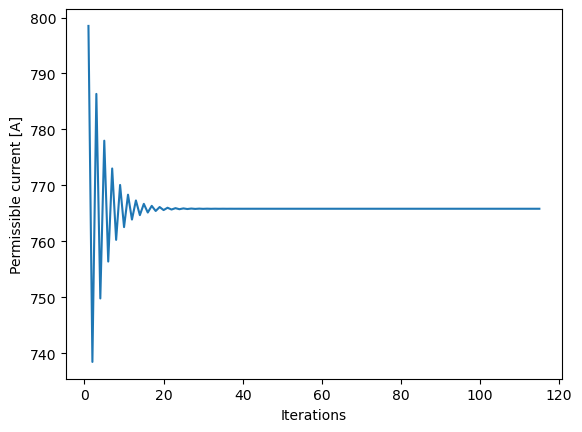

In [15]:
# Permissible current convergence plot
Iplt = I[0:i+1,0]

plt.figure()
plt.plot(list(range(1,i+2)),Iplt)
plt.xlabel('Iterations')
plt.ylabel('Permissible current [A]')
plt.show()


In [16]:
# Permissible current rounding
print("I3 = %.4f A, I1 = %.4f A, I2 = %.4f A" % (I[i,0], I[i,1], I[i,2]))

Imin = min(I[i,:])

if Imin < 200:
    I_rating = int(Imin)
elif Imin < 500:
    I_rating = int(Imin/5)*5
else:
    I_rating = int(Imin/10)*10
        
print("The permissible current rating of one conductor is equal to %5d A" % I_rating)

I3 = 765.8209 A, I1 = 891.1261 A, I2 = 792.0775 A
The permissible current rating of one conductor is equal to   760 A
